In [54]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity


In [55]:
fire_data    = pd.read_csv("fire/data/fires_spain_since_2010.csv")
tourism_data = pd.read_csv("tourism/data.csv")

tourism_data.shape, fire_data.shape

((93586, 5), (52752, 4))

In [56]:
fire_data.sort_values("date", ascending=False).head()

,lat,lon,fire_val,date
16057,43.545833,-5.846251,8.0,2020-02-07
16067,43.087500,-0.062759,8.0,2020-02-07
16059,43.537500,-5.845443,8.0,2020-02-07
16060,43.537500,-5.833947,8.0,2020-02-07
16061,43.370833,-3.227067,8.0,2020-02-07


In [42]:
# bounding box of tourism data (fire data is "larger")
lat_min = tourism_data.lat.min()
lat_max = tourism_data.lat.max()
lon_min = tourism_data.lon.min()
lon_max = tourism_data.lon.max()
lat_min, lat_max, lon_min, lon_max

(41.7907476, 43.7903123, -9.2989921, -6.7159627)

In [43]:
# fire data is available for more regions => filter approx to tourism data
fire_data = (
    fire_data
    .query("lat.between(@lat_min, @lat_max)")
    .query("lon.between(@lon_min, @lon_max)")
)

In [44]:
fire_data.sort_values("date", ascending=False).head()

,lat,lon,fire_val,date
33910,41.904167,-8.403168,8.0,2020-01-21
50218,42.312500,-6.733296,8.0,2019-12-29
1828,41.979167,-6.978186,8.0,2019-10-12
1827,41.987500,-6.979099,8.0,2019-10-12
1826,42.170833,-7.055511,8.0,2019-10-12


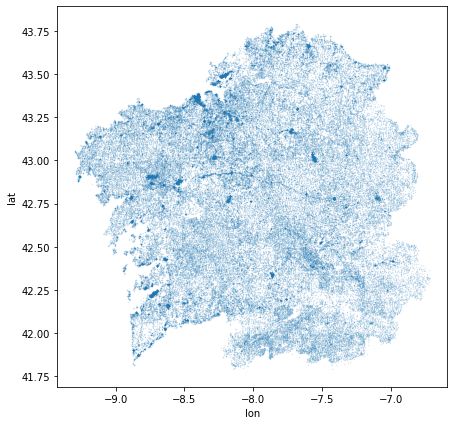

In [45]:
tourism_data.plot.scatter(x="lon", y="lat", s=.1, alpha=.25, figsize=(7,7))

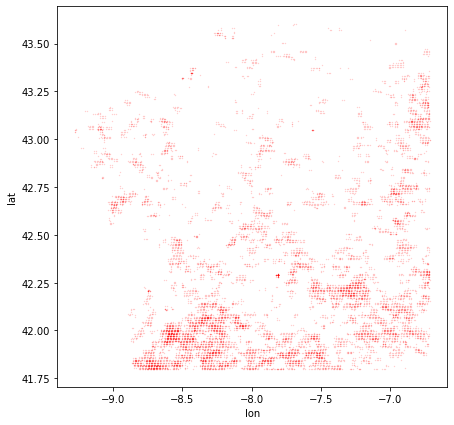

In [25]:
fire_data.plot.scatter(x="lon", y="lat", s=.1, alpha=.25, figsize=(7,7), c="r")

In [9]:
X_tourism = np.deg2rad(tourism_data[["lat","lon"]].to_numpy())
X_fire    = np.deg2rad(fire_data[["lat","lon"]].to_numpy())

In [ ]:
# probe grid
probe_grid_ticks_lat = np.linspace(lat_min, lat_max, num=20)
probe_grid_ticks_lon = np.linspace(lon_min, lon_max, num=20)
probe_grid_lats, probe_grid_lons = np.meshgrid(probe_grid_ticks_lat, probe_grid_ticks_lon)
probe_grid_lats = probe_grid_lats.flatten()
probe_grid_lons = probe_grid_lons.flatten()
X_probe = np.array([probe_grid_lats, probe_grid_lons]).T
X_probe.shape

In [10]:
kde_tourism = KernelDensity(bandwidth=.0005, metric="haversine", atol=0.0).fit(X_tourism)
kde_fire    = KernelDensity(bandwidth=.0005, metric="haversine", atol=0.0).fit(X_fire)

(400, 2)

In [48]:
scores_tourism = kde_tourism.score_samples(X_probe)
scores_fire = kde_fire.score_samples(X_probe)

In [53]:
np.corrcoef(scores_tourism, scores_fire)

array([[1.        , 0.99995358],
       [0.99995358, 1.        ]])